In [18]:
pip install holidays --user

  Using cached https://files.pythonhosted.org/packages/d9/c7/1d0cb8f69bb4caa252a0c95de66a34e0548cbf9d3f4a2353cba5ee5f566c/holidays-0.10.3.tar.gz
     |████████████████████████████████| 51kB 11.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/15/41/aa426a4a9141afd8e7f5c8312bb59d5693274f3f7b34e73bdce4ee48b4c1/korean_lunar_calendar-0.2.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2c/30/47957d487fff94083bdd17247734c165f12b5ac39a3abd1aa476a93eea6e/PyMeeus-0.3.7.tar.gz
  ERROR: Complete output from command /opt/jupyterhub/anaconda/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-25pfcmzg/holidays/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-73u794zf --python-tag cp36:
  ERROR: running bdist_wheel
  using gpu 0
  Traceback (most recent call last):
    File

Failed to build holidays pymeeus
  Running setup.py install for pymeeus ... done
  Running setup.py install for holidays ... done
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import packages
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn import metrics
from sklearn import preprocessing
import holidays

df_postnl = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])
df_postnl

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
0,2015-01-02,klant_1,0,0,train
1,2015-01-02,klant_100,0,0,train
2,2015-01-02,klant_101,0,0,train
3,2015-01-02,klant_103,0,0,train
4,2015-01-02,klant_104,0,0,train
...,...,...,...,...,...
505695,2020-04-29,klant_95,68,60,test
505696,2020-04-29,klant_96,0,0,test
505697,2020-04-29,klant_97,66,123,test
505698,2020-04-29,klant_98,2035,2133,test


In [11]:
df_knmi = pd.read_csv('/datc/parcel/notebooks/data/knmi/KNMI_20200710.csv', parse_dates=[1])
df_knmi

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,3,4,5,6,7,8,13,15,16,18,19,20,21,22,23,25,26,28,30,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,260,1901-01-01,,,,,,,,,...,,,,,66,,,,,
1,260,1901-01-02,,,,,,,,,...,,,,,86,,,,,
2,260,1901-01-03,,,,,,,,,...,,,,,89,,,,,
3,260,1901-01-04,,,,,,,,,...,,,,,79,,,,,
4,260,1901-01-05,,,,,,,,,...,,,,,65,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43651,260,2020-07-06,271,44,45,60,7,20,21,130,...,3,81,11,5,71,92,24,57,12,31
43652,260,2020-07-07,271,19,25,50,10,10,1,100,...,2,82,16,7,77,99,2,52,13,31
43653,260,2020-07-08,187,6,18,30,9,10,1,60,...,24,65,11,8,94,97,22,90,11,9
43654,260,2020-07-09,230,36,38,50,5,10,1,120,...,2,70,22,8,93,98,1,87,15,8


In [12]:
#knmi data plus post nl data
df = pd.merge(df_postnl, df_knmi, how='inner', left_index=True, right_index=True)
df

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,STN,YYYYMMDD,DDVEC,FHVEC,FG,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,2015-01-02,klant_1,0,0,train,260,1901-01-01,,,,...,,,,,66,,,,,
1,2015-01-02,klant_100,0,0,train,260,1901-01-02,,,,...,,,,,86,,,,,
2,2015-01-02,klant_101,0,0,train,260,1901-01-03,,,,...,,,,,89,,,,,
3,2015-01-02,klant_103,0,0,train,260,1901-01-04,,,,...,,,,,79,,,,,
4,2015-01-02,klant_104,0,0,train,260,1901-01-05,,,,...,,,,,65,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43651,2015-06-18,klant_69,144,36,train,260,2020-07-06,271,44,45,...,3,81,11,5,71,92,24,57,12,31
43652,2015-06-18,klant_7,10,3,train,260,2020-07-07,271,19,25,...,2,82,16,7,77,99,2,52,13,31
43653,2015-06-18,klant_70,0,0,train,260,2020-07-08,187,6,18,...,24,65,11,8,94,97,22,90,11,9
43654,2015-06-18,klant_71,0,0,train,260,2020-07-09,230,36,38,...,2,70,22,8,93,98,1,87,15,8


In [13]:
df_postnl_vorige_week = df_postnl.copy()
df_postnl_vorige_week['aantal_pakketten_vorige_week'] = df_postnl_vorige_week['aantal_pakketten'].shift(7)
df_postnl_vorige_week['aantal_pakketten_vorige_week'].fillna(0, inplace=True)

In [14]:
df_postnl_vorige_week.head(30)

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,aantal_pakketten_vorige_week
0,2015-01-02,klant_1,0,0,train,0.0
1,2015-01-02,klant_100,0,0,train,0.0
2,2015-01-02,klant_101,0,0,train,0.0
3,2015-01-02,klant_103,0,0,train,0.0
4,2015-01-02,klant_104,0,0,train,0.0
5,2015-01-02,klant_106,14,0,train,0.0
6,2015-01-02,klant_108,3,0,train,0.0
7,2015-01-02,klant_109,6,0,train,0.0
8,2015-01-02,klant_11,0,0,train,0.0
9,2015-01-02,klant_110,0,0,train,0.0


In [18]:
#read CSV file
df_postnl = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0], index_col=[0])

#select every row where cust_id is equal to "klant_153"
custfilter = df_postnl['cust_id'] == 'klant_165'
df_postnl = df_postnl.where(custfilter).dropna()

#remove data for the year 2020, since we'll not includes this
df_postnl = df_postnl[:'2019'].dropna()

#delete columns: cust_id and validation column.
df_postnl = df_postnl.drop(['cust_id', 'validation_column'], axis=1)
df_postnl

,aantal_pakketten,aantal_pakketten_volgende_dag
procesdag,,
2015-01-02,17.0,0.0
2015-01-03,0.0,0.0
2015-01-04,0.0,56.0
2015-01-05,56.0,82.0
2015-01-06,82.0,390.0
...,...,...
2019-12-27,101.0,0.0
2019-12-28,0.0,1.0
2019-12-29,1.0,147.0


In [16]:
# Encode the day of the week and month
df_postnl.insert(loc=1, column='weekdag', value=df_postnl['procesdag'].dt.dayofweek)
df_postnl.insert(loc=2, column='maand', value=df_postnl['procesdag'].dt.month_name(locale= 'en_US.UTF.8'))
df_postnl = pd.get_dummies(df_postnl, columns=['weekdag', 'maand'])
df_postnl

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,weekdag_0,weekdag_1,weekdag_2,weekdag_3,weekdag_4,...,maand_December,maand_February,maand_January,maand_July,maand_June,maand_March,maand_May,maand_November,maand_October,maand_September
59,2015-01-02,klant_165,17.0,0.0,train,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
319,2015-01-03,klant_165,0.0,0.0,train,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
579,2015-01-04,klant_165,0.0,56.0,train,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
839,2015-01-05,klant_165,56.0,82.0,train,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1099,2015-01-06,klant_165,82.0,390.0,train,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473259,2019-12-27,klant_165,101.0,0.0,validation,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
473519,2019-12-28,klant_165,0.0,1.0,validation,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
473779,2019-12-29,klant_165,1.0,147.0,validation,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
474039,2019-12-30,klant_165,147.0,114.0,validation,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
#split train and test
train = df_postnl[:'2017'].dropna()
validation = df_postnl['2018'].dropna()
test= df_postnl['2019'].dropna()

#define Y train, valid and test
y_train = train.loc[:, 'aantal_pakketten_volgende_dag']
y_valid = validation.loc[:, 'aantal_pakketten_volgende_dag']
y_test = test.loc[:, 'aantal_pakketten_volgende_dag']

#define X train, valid and test
x_train = train.loc[:, train.columns != 'aantal_pakketten_volgende_dag']
x_valid = validation.loc[:, validation.columns != 'aantal_pakketten_volgende_dag']
x_test = test.loc[:, test.columns != 'aantal_pakketten_volgende_dag']

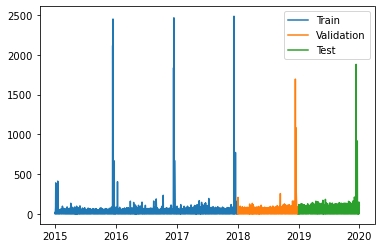

In [20]:
plt.plot(train.index, train['aantal_pakketten'], label='Train')
plt.plot(validation.index, validation['aantal_pakketten'], label='Validation')
plt.plot(test.index, test['aantal_pakketten'], label='Test')
plt.legend()

In [21]:
#initialize scaler and fit on the training data
scaler = preprocessing.StandardScaler()

#transform training and validation set
train_scaled = pd.DataFrame(scaler.fit_transform(train), index=train.index, columns=train.columns)
validation_scaled = pd.DataFrame(scaler.fit_transform(validation), index=validation.index, columns=validation.columns)
test_scaled = pd.DataFrame(scaler.fit_transform(test), index=test.index, columns=test.columns)

#define Y scaled
y_train_scaled = train_scaled.loc[:, 'aantal_pakketten_volgende_dag']
y_valid_scaled = validation_scaled.loc[:, 'aantal_pakketten_volgende_dag']
y_test_scaled = test_scaled.loc[:, 'aantal_pakketten_volgende_dag']

#define X scaled
x_train_scaled = train_scaled.loc[:, train_scaled.columns != 'aantal_pakketten_volgende_dag']
x_valid_scaled = validation_scaled.loc[:, validation_scaled.columns != 'aantal_pakketten_volgende_dag']
x_test_scaled = test_scaled.loc[:, test_scaled.columns != 'aantal_pakketten_volgende_dag']

In [22]:
#fit model
model_scaled = LinearRegression()
model_scaled.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [23]:
# Make prediction
pred_scaled = model_scaled.predict(x_valid_scaled)
validation_scaled['aantal_pakketten_volgende_dag'] = pred_scaled

# Descale validation set
validation_prediction = scaler.inverse_transform(validation_scaled.to_numpy())
validation_prediction = pd.DataFrame(validation_prediction, index=validation.index, columns=validation.columns)


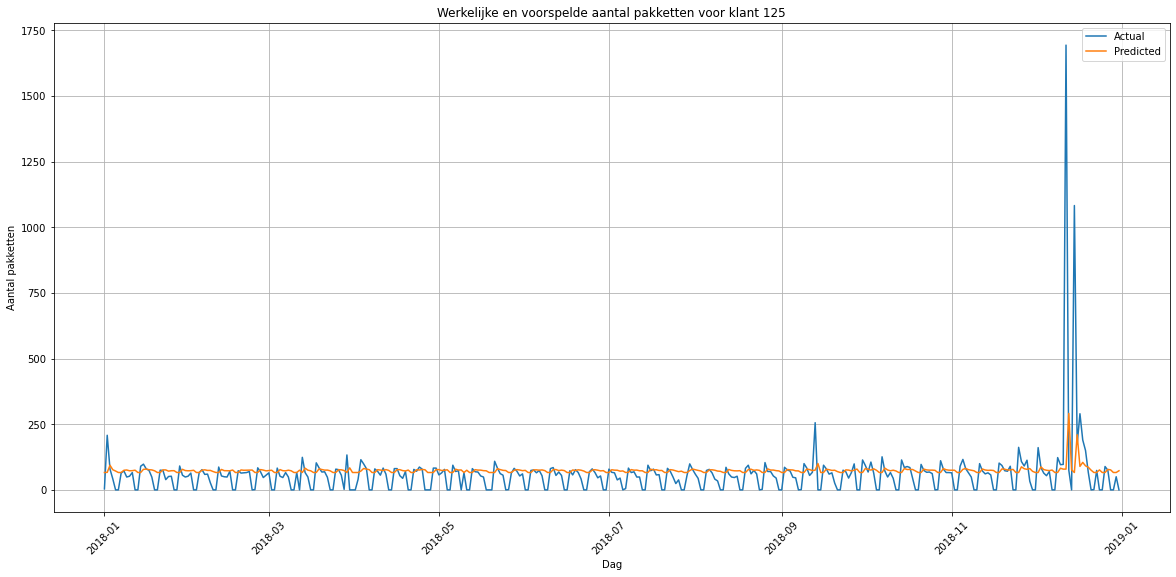

In [26]:
# Plot actual vs. predicted
fig, ax = plt.subplots(figsize=(20,9))
ax.plot(validation.index, validation.loc[:, 'aantal_pakketten_volgende_dag'], label='Actual')
ax.plot(validation.index, validation_prediction.loc[:, 'aantal_pakketten_volgende_dag'], label='Predicted')
ax.set(
    xlabel='Dag',
    ylabel='Aantal pakketten',
    title='Werkelijke en voorspelde aantal pakketten voor klant 125')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

In [27]:
# validate model
rmse_scaled = (np.sqrt(metrics.mean_squared_error(validation.loc[:, 'aantal_pakketten_volgende_dag'], validation_prediction.loc[:, 'aantal_pakketten_volgende_dag'])))
mae_scaled = (metrics.mean_absolute_error(validation.loc[:, 'aantal_pakketten_volgende_dag'], validation_prediction.loc[:, 'aantal_pakketten_volgende_dag']))
r2_scaled = metrics.r2_score(validation.loc[:, 'aantal_pakketten_volgende_dag'], validation_prediction.loc[:, 'aantal_pakketten_volgende_dag'])

print('Root Mean Squared Error:', rmse_scaled)
print('Mean Absolute Error:', mae_scaled)
print('R2_Score', r2_scaled)

Root Mean Squared Error: 110.79520196301966
Mean Absolute Error: 43.21583859117301
R2_Score -0.016580916201273777


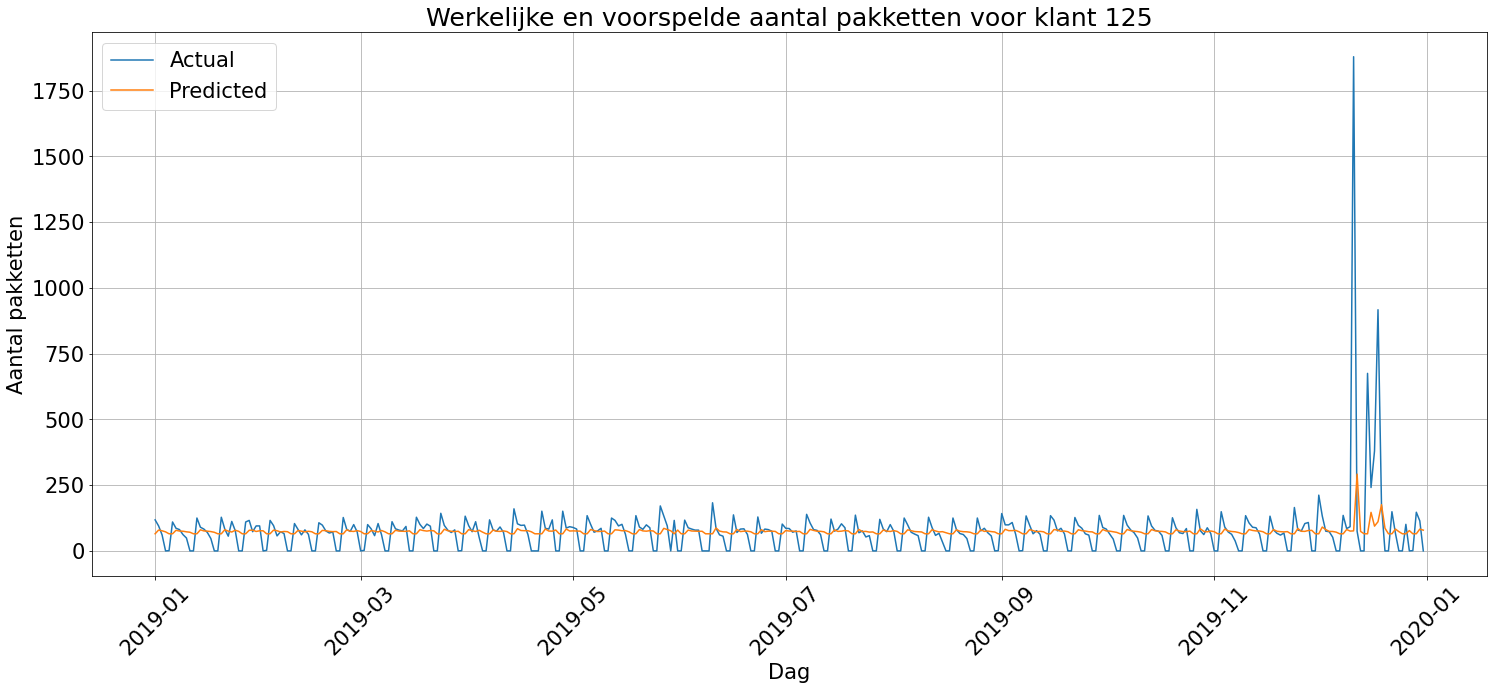

Root Mean Squared Error: 120.04076725056038
Mean Absolute Error: 48.12241336769573
R2_Score 0.013825961551603205


In [29]:
# Test the model on the test set
test_pred = model_scaled.predict(x_test_scaled)
test_scaled['aantal_pakketten_volgende_dag'] = test_pred

# Descale test set
test_prediction = scaler.inverse_transform(test_scaled.to_numpy())
test_prediction = pd.DataFrame(test_prediction, index=test.index, columns=test.columns)

# Plot actual vs. predicted
plt.rcParams.update({'font.size': 21})
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(test.index, test.loc[:, 'aantal_pakketten_volgende_dag'], label='Actual')
ax.plot(test.index, test_prediction.loc[:, 'aantal_pakketten_volgende_dag'], label='Predicted')
ax.set(
    xlabel='Dag',
    ylabel='Aantal pakketten',
    title='Werkelijke en voorspelde aantal pakketten voor klant 125')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

rmse = (np.sqrt(metrics.mean_squared_error(test.loc[:, 'aantal_pakketten_volgende_dag'], test_prediction.loc[:, 'aantal_pakketten_volgende_dag'])))
mae = (metrics.mean_absolute_error(test.loc[:, 'aantal_pakketten_volgende_dag'], test_prediction.loc[:, 'aantal_pakketten_volgende_dag']))
r2 = metrics.r2_score(test.loc[:, 'aantal_pakketten_volgende_dag'], test_prediction.loc[:, 'aantal_pakketten_volgende_dag'])

print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R2_Score', r2)